# 경사하강법

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## $f(x, y) = (1-x)^2+100(y-x^2)^2$ 의 최소값을 경사하강법을 (또는 최대값을 경사상승법을) 사용하여 구하라. 해당 함수는 Rosenbrock function이다.

### 1.1. gradient를 구한다.

$$\frac{\partial}{\partial x}f(x, y)=400x^3 - 400xy +2x -2$$ $$\frac{\partial}{\partial y}f(x, y)=200y-200x^2$$

In [2]:
def get_gradient(v):
    """편미분 함수를 구한다. 즉 시점에서의 gradient"""
    return [400 * v[0] ** 3 - 400 * v[0] * v[1] + 2 * v[0] - 2, 200 * v[1] - 200 * v[0] ** 2]

### 1.2. step을 구한다.

$$x_{t+1} = x_{t} -\rho \frac{\partial}{\partial x}f(x, y)=x_{t}-\rho \times (400x^3 - 400xy +2x -2)$$
$$y_{t+1} = y_{t} -\rho \frac{\partial}{\partial y}f(x, y)=y_{t}-\rho \times (200y-200x^2)$$

In [3]:
def step(v, gradient, step_size):
    """현재 위치에서 step_size와 gradient 이용하여 이동한다."""
    return [v_i - step_size * direction_i 
            for v_i, direction_i in zip(v, gradient)]

### 1.3. 시작점은 랜덤하게 선택해보자.

In [4]:
import numpy as np

random_generator = np.random.RandomState(42)

# 첫번째 시작점 x_0, y_0를 선택한다.
v = [random_generator.randint(-1, 1) for _ in range(2)]
v

[-1, 0]

### 4. alpha (학습률)를 설정하자.

In [5]:
alpha = 0.0001

### 5. 알고리즘을 멈출 조건을 설정하자.

이전의 위치와 현재의 위치가 tolerance 보다 작으면 멈춘다. 즉 $$\text{dist}(v_t, v_{t+1}) < \text{tolerance} \text{  where  } v=(x, y)$$ 이면 멈춘다.

In [6]:
import math
def distance(v, w):
    return math.sqrt(sum([(v_i - w_i)**2 for v_i, w_i in zip(v, w)]))

In [7]:
cnt = 0  # 중간 결과값을 출력할 때 사용하기 위함
tol = 0.000001

gradients = []  # Gradient의 변화
plot_points = []  # Plotting을 위한 것

while True:
    cnt += 1
    gradient = get_gradient(v)  # 시점에서의 gradient
    next_v = step(v, gradient, alpha)
    if not cnt % 2000:
        plot_points.append(next_v)
        gradients.append(next_v)
        print(next_v)  # Debugging 용
    if distance(next_v, v) < tol:
        break
    
    v = next_v

[-0.19761380324149116, 0.043302073938762155]
[0.18222993666997303, 0.03063037818988261]
[0.3913056052634935, 0.15015858076679264]
[0.5108042594356964, 0.25846952517092364]
[0.5912087224977017, 0.34750822139323573]
[0.6504802693429919, 0.42143310658913863]
[0.6966173215665018, 0.48383663322696574]
[0.7338323898045546, 0.5372700080914804]
[0.7646092036191753, 0.5835479273748608]
[0.790533604573907, 0.6239962271197904]
[0.8126795642755671, 0.6596113523365783]
[0.8318080366483152, 0.691161374078296]
[0.8484778053083784, 0.7192513519983372]
[0.8631112361911418, 0.7443668584048279]
[0.8760352885843747, 0.7669038002787215]
[0.887508175158854, 0.7871893983845436]
[0.8977373048777475, 0.8054972994700824]
[0.906891720937204, 0.8220586948835326]
[0.915110944769114, 0.8370706566284047]
[0.9225114053373618, 0.8507024933824777]
[0.9291912048147963, 0.8631006705368324]
[0.9352337124933495, 0.8743926708098393]
[0.9407103170120498, 0.8846900610198617]
[0.9456825633095024, 0.8940909555760577]
[0.9502038

In [8]:
# Numpy array로 변경하면 사용이 편하다.
gradients = np.array(gradients)

x = gradients[:, 0]
y = gradients[:, 1]

In [9]:
# 등고선을 그리기 위해서는 meshgrid가 필요함
X, Y = np.meshgrid(x, y)
Z = (1-X) ** 2 + 100*(Y-X ** 2) ** 2

In [10]:
# 최소값의 변화를 확인하기 위하여 plot
plot_points = np.array(plot_points)

px = plot_points[:, 0]
py = plot_points[:, 1]

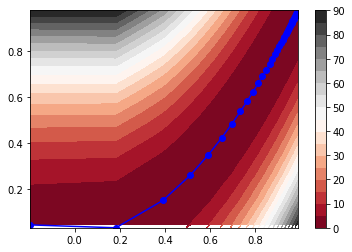

In [11]:
contours = plt.contourf(x, y, Z, 20, cmap='RdGy')
plt.plot(px, py, "b-o")
plt.colorbar();